In [1]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

In [2]:
path = 'binary_lena.jpg'

b_lena = cv2.imread(path)

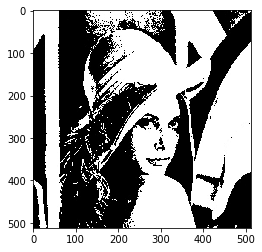

In [3]:
plt.imshow(b_lena)

In [4]:
map_lena = np.reshape([1 if np.mean(h) > 127 else 0 for w in b_lena for h in w], (512,512,1))

In [5]:
count = 1
for i in range(512):
    for j in range(512):
        if map_lena[i][j][0] == 1:
            map_lena[i][j][0] = count
            count += 1

In [6]:
def top_down(X):
    X = X.copy()
    for i in range(512):
        for j in range(512):
            if X[i][j][0] != 0:
                c_4 = [X[i][j][0]]
                if i > 0:
                    c_4.append(X[i-1][j][0])
                if j > 0:
                    c_4.append(X[i][j-1][0])
                if i < 511:
                    c_4.append(X[i+1][j][0])
                if j < 511:
                    c_4.append(X[i][j+1][0])
                    
                X[i][j][0] = min_clip(c_4)
                
    return X

def bottom_up(X):
    X = X.copy()
    for i in range(511, -1, -1):
        for j in range(511, -1, -1):
            if X[i][j][0] != 0:
                c_4 = [X[i][j][0]]
                if i > 0:
                    c_4.append(X[i-1][j][0])
                if j > 0:
                    c_4.append(X[i][j-1][0])
                if i < 511:
                    c_4.append(X[i+1][j][0])
                if j < 511:
                    c_4.append(X[i][j+1][0])
                    
                X[i][j][0] = min_clip(c_4)
                
    return X

In [7]:
def min_clip(X):
    return min(i for i in X if i > 0)

In [8]:
def iterative_cc(X):
    start_time = time.time()
    X = X.copy()
    c_flag = True
    count = 1
    l_sum = X.sum()
    while c_flag:
        Y = top_down(X)
        X = bottom_up(Y)
        n_sum = X.sum()
        
        print('Iteration:', str(count), ', sum:', str(n_sum))
        count += 1
        
        if l_sum - n_sum == 0:
            c_flag = False
        else:
            l_sum = n_sum
    
    u_time = time.time() - start_time
    print('Used time: %.2f' % (u_time))
    
    return X

In [9]:
X = iterative_cc(map_lena)

Iteration: 1 , sum: 2647398491
Iteration: 2 , sum: 848721501
Iteration: 3 , sum: 779462480
Iteration: 4 , sum: 747724438
Iteration: 5 , sum: 731926960
Iteration: 6 , sum: 721415094
Iteration: 7 , sum: 718261091
Iteration: 8 , sum: 717108715
Iteration: 9 , sum: 714912620
Iteration: 10 , sum: 711707804
Iteration: 11 , sum: 706639114
Iteration: 12 , sum: 699499033
Iteration: 13 , sum: 689458029
Iteration: 14 , sum: 671148405
Iteration: 15 , sum: 646473247
Iteration: 16 , sum: 613021187
Iteration: 17 , sum: 592163753
Iteration: 18 , sum: 583435935
Iteration: 19 , sum: 582135681
Iteration: 20 , sum: 582135681
Used time: 40.43


In [10]:
tmp = X.copy()

In [11]:
px_list = {}

for i in range(512):
    for j in range(512):
        if tmp[i][j][0] not in px_list:
            px_list[tmp[i][j][0]] = 1
        else:
            px_list[tmp[i][j][0]] += 1

In [12]:
px_dic = {}

for key, value in px_list.items():
    if value > 500 and key != 0:
        px_dic[key] = value

In [13]:
color = [[255, 0, 0], [0, 255, 0], [0, 0, 255], \
         [255, 255, 0], [0, 255, 255], [255, 0, 255], \
        [128, 0, 128]]

In [14]:
## Coloring connected component with different color

# c_lena = b_lena.copy()
# cc = 0
# for key, value in px_dic.items():
#     for i in range(512):
#         for j in range(512):
#             if tmp[i][j][0] == key:
#                 c_lena[i][j] = color[cc]
#     cc += 1

In [41]:
bb_dic = {'row':{}, 'col':{}}

for key, value in px_dic.items():
    for i in range(512):
        for j in range(512):
            # Row
            if tmp[i][j][0] == key:
                if key not in bb_dic['row']:
                    bb_dic['row'][key] = [i]
                elif i not in bb_dic['row'][key]:
                    bb_dic['row'][key].append(i)
                    min_val = min(bb_dic['row'][key])
                    max_val = max(bb_dic['row'][key])
                    bb_dic['row'][key] = [min_val, max_val]
            if tmp[i][j][0] == key:
                if key not in bb_dic['col']:
                    bb_dic['col'][key] = [j]
                elif j not in bb_dic['col'][key]:
                    bb_dic['col'][key].append(j)
                    min_val = min(bb_dic['col'][key])
                    max_val = max(bb_dic['col'][key])
                    bb_dic['col'][key] = [min_val, max_val]

In [99]:
def draw_centroid(X, Y, image, color):
    to_return = image.copy()
    center_x = (X[0] + X[1])//2
    center_y = (Y[0] + Y[1])//2
    to_return[center_x][center_y] = color
    for i in range(10,-1,-1):
        for j in range(2): 
            to_return[center_x-i][center_y-j] = color
            to_return[center_x-i][center_y] = color
            to_return[center_x-i][center_y+j] = color

            to_return[center_x+i][center_y-j] = color
            to_return[center_x+i][center_y] = color
            to_return[center_x+i][center_y+j] = color

            to_return[center_x-j][center_y-i] = color
            to_return[center_x][center_y-i] = color
            to_return[center_x+j][center_y-i] = color

            to_return[center_x-j][center_y+i] = color
            to_return[center_x][center_y+i] = color
            to_return[center_x+j][center_y+i] = color
    
    return to_return

In [100]:
def draw_bounding_box(X, Y, image, color):
    to_return = image.copy()
    bouding_size = 2
    for i in range(X[0], X[1]+1):
        for j in range(Y[0], Y[1]+1):
            if (i >= X[0] and i <= X[0]+bouding_size) or (i >= X[1]-bouding_size and i <= X[1]):
                to_return[i][j] = color
            if (j >= Y[0] and j <= Y[0]+bouding_size) or (j >= Y[1]-bouding_size and j <= Y[1]):
                to_return[i][j] = color
    
    return to_return

In [104]:
bb_lena = b_lena.copy()
cl = [0, 0, 255]

for x, y in zip(bb_dic['row'], bb_dic['col']):
    bb_lena = draw_bounding_box(bb_dic['row'][x], bb_dic['col'][y], bb_lena, cl)
    bb_lena = draw_centroid(bb_dic['row'][x], bb_dic['col'][y], bb_lena, cl)

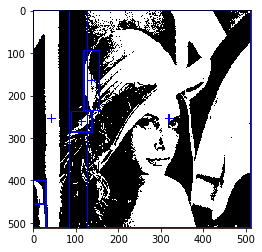

In [105]:
plt.imshow(bb_lena)

In [106]:
cv2.imwrite('sample.png', bb_lena)

True